In [1]:
import numpy as np
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df = pd.read_pickle('testingdf.pkl')
df = df.replace(pd.NA, np.nan)
df

,76561197996823194,76561198014242604,76561198005523871,76561198085946962,76561198054109103,76561198093620101,76561198096369389,76561197993050013,76561198089088546,76561198068751421,...,76561198098674820,76561198087694481,76561198061063257,76561198071401138,76561198094672501,76561198080752551,76561198097082417,76561198095866324,76561198071682435,76561198090997249
300,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
20,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,NaN
1103100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1700870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2054.0,NaN
1659040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1278.0,NaN


In [3]:
# This cell removes all zeroes from the dataframe, if uncommented.

# df = df.replace(np.nan, 0)
# df = df.replace(0, np.nan)
# df

In [4]:
class MFRecommender():
    """
    Matrix factorization recommender model object.
    
    Attributes:
        game_weights (np.array): matrix of weights corresponding to user 
            profile weights for each game.
        user_weights (np.array): matrix of weights corresponding to how to 
            represent each user as a linear combination of user profiles.
        filled_entries (List[tuple(int)]): list of index pairs (i,j) of the
            non-null entries of df. 
    """
    
    
    def __init__(self, df, k, lr=0.001, l2=0.001):
        """
        Initializes the model.
        
        Args:
            df (pd.DataFrame): sparse dataframe of user playtime info.
            k (int): Number of user profiles for the model.
            lr (float): learning rate for SGD.
            l2 (float): l2 penalty for training the weights.
        """
        self.df = df
        self.game_weights = np.random.rand(df.shape[0],k)
        self.user_weights = np.random.rand(k, df.shape[1])
        self.filled_entries = []
        self.lr = lr
        self.l2 = l2
        for i in range(df.shape[0]):
            for j in range(df.shape[1]):
                if not pd.isna(df.iat[i,j]):
                    self.filled_entries.append((i,j))
    
    
    def fit(self, epochs):
        """
        Fits the model a certain number of epochs based on the df provided.
        Args:
            epochs (int): number of epochs to train the model
        """
        for k in range(epochs):
            print('Fitting epoch {}...'.format(k+1))
            pred = np.matmul(self.game_weights, self.user_weights)
            t_game_weights = np.copy(self.game_weights)
            t_user_weights = np.copy(self.user_weights)
            
            # apply l2 penalty
            self.game_weights = t_game_weights*(1 - self.lr*self.l2)
            self.user_weights = t_user_weights*(1 - self.lr*self.l2)
            
            # Update with SGD
            for i, j in self.filled_entries:
                for l in range(self.user_weights.shape[0]):
                    diff = (self.df.iat[i,j]-pred[i,j])
                    self.game_weights[i,l] += self.lr*t_user_weights[l,j]*diff
                    self.user_weights[l,j] += self.lr*t_game_weights[i,l]*diff
            print('Train MSE = {}'.format(self.train_MSE()))
    
    
    def train_loss(self):
        loss = 0
        pred = np.matmul(self.game_weights, self.user_weights)
        for i, j in self.filled_entries:
            print(self.df.iat[i,j], pred[i,j])
            loss += (self.df.iat[i,j] - pred[i,j])**2
        return loss
    
    
    def train_MSE(self):
        loss = 0
        pred = np.matmul(self.game_weights, self.user_weights)
        for i, j in self.filled_entries:
            # print(self.df.iat[i,j], pred[i,j])
            loss += (self.df.iat[i,j] - pred[i,j])**2
        return loss/len(self.filled_entries)
                
                
                
        

In [5]:
# Note that the outliers in the data will prevent convergence unless we log-normalize first.

log_df = df.applymap(lambda x: np.log10(x+1) if not np.isnan(x) else x)
log_df

,76561197996823194,76561198014242604,76561198005523871,76561198085946962,76561198054109103,76561198093620101,76561198096369389,76561197993050013,76561198089088546,76561198068751421,...,76561198098674820,76561198087694481,76561198061063257,76561198071401138,76561198094672501,76561198080752551,76561198097082417,76561198095866324,76561198071682435,76561198090997249
300,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,1.531479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,0.000000,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
20,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.863323,NaN
1103100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
1700870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.312812,NaN
1659040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.106871,NaN


In [6]:
clf = MFRecommender(log_df, 3, lr = 0.001, l2=0)
clf

In [7]:
clf.fit(100)

Fitting epoch 1...
MSE = 2.0671233709974053
Fitting epoch 2...
MSE = 1.873209321036168
Fitting epoch 3...
MSE = 1.7356919848311345
Fitting epoch 4...
MSE = 1.6307766399009398
Fitting epoch 5...
MSE = 1.5478566263354785
Fitting epoch 6...
MSE = 1.4809078280887622
Fitting epoch 7...
MSE = 1.4259437232455883
Fitting epoch 8...
MSE = 1.3801151863814087
Fitting epoch 9...
MSE = 1.3413200765312623
Fitting epoch 10...
MSE = 1.3079923651379082
Fitting epoch 11...
MSE = 1.2789628255449863
Fitting epoch 12...
MSE = 1.2533571450638115
Fitting epoch 13...
MSE = 1.2305187139486642
Fitting epoch 14...
MSE = 1.2099505705549287
Fitting epoch 15...
MSE = 1.1912723933430938
Fitting epoch 16...
MSE = 1.1741891920230707
Fitting epoch 17...
MSE = 1.1584687552291282
Fitting epoch 18...
MSE = 1.1439255070978622
Fitting epoch 19...
MSE = 1.1304089449863477
Fitting epoch 20...
MSE = 1.117795320469186
Fitting epoch 21...
MSE = 1.1059815991792714
Fitting epoch 22...
MSE = 1.0948810249763214
Fitting epoch 23...
M

In [8]:
clf.train_loss()

0.0 0.34771478033000214
0.0 0.9358385689785652
2.640481436970422 0.7707173841598982
0.0 0.9507022881826241
0.0 0.6429521900125025
0.0 0.810480855523697
0.0 0.837499723098065
2.3944516808262164 1.2472577472667905
0.0 0.22972958837237512
0.0 0.9701867586361074
0.0 1.1183673511002823
2.4265112613645754 1.0264065452723308
0.0 0.4181314620516132
2.6954816764901977 1.0226669828465522
1.5314789170422551 0.13355218385141704
0.0 0.1936646017711422
0.0 0.2126447513816698
0.0 0.036334004418978966
0.0 0.2781443556405626
0.0 0.15680279062182895
0.0 0.15979744956529485
0.0 0.1897835625121887
0.0 0.1785759457451993
0.3010299956639812 0.2348255189172845
0.0 0.11446139990080842
0.0 0.037375264725767965
0.0 -0.012085614434981178
0.0 0.05326076285127934
0.0 0.21201422997770053
0.0 0.051319499583254324
0.0 -0.1630945844155583
0.0 0.22014721244859198
0.0 0.1111235296640479
0.0 -0.10580986997845537
0.0 -0.09376434073441614
0.0 -0.005111135115214188
0.0 0.18654256920397905
0.0 0.028198708140070472
0.0 0.1348

1.2041199826559248 0.9931361514946968
1.8808135922807914 1.0417162426078068
0.0 0.27605748723470597
0.6989700043360189 0.7678163557317411
1.505149978319906 1.188346500976531
0.0 1.0133593299718537
0.0 0.892500490645022
3.2920344359947364 1.0361735671400116
3.1482940974347455 1.6223813213950316
3.0115704435972783 1.7570571502690657
0.0 1.8566362840450712
1.9444826721501687 0.7630117907213033
1.6020599913279623 2.0067430689864305
1.9637878273455553 1.9818689679660748
0.0 0.5147100276198315
0.0 0.14488241475258226
1.1760912590556813 1.5853566621727848
2.4927603890268375 0.8976096407099393
0.0 0.292367846836585
0.0 0.761194803045369
2.561101383649056 1.4575240382277967
2.7151673578484576 1.2357937858213863
0.0 0.6603807905281237
0.0 0.4357126249466339
0.0 0.49895938532455686
0.0 0.24640638939054255
0.0 0.09215621998013679
0.0 0.5459205996012884
0.0 0.24831181001079744
0.0 0.09345315324597574
0.0 0.27999695413504183
0.0 0.5670944862685267
0.3010299956639812 0.32141504940868926
0.0 0.0865124

3.8767372971406644 2.309026689742603
2.760422483423212 1.8513490227330776
2.3654879848909 2.0649987931238103
0.0 0.2911230404976337
0.0 -0.16847318395603234
2.271841606536499 2.4407628702874185
2.9222062774390163 2.377934724314343
0.0 0.9117867134679325
0.0 0.0243651411943688
2.6646419755561257 2.120993294214066
1.806179973983887 2.538715948627082
3.9676883504533125 2.346861874986392
0.7781512503836436 1.3994731297071115
2.8981764834976764 2.2974229297180653
3.2629254693318317 2.453891569528317
1.9777236052888478 2.74619838131697
2.963787827345555 2.2386649587878895
1.8864907251724818 1.5867813748501276
2.1958996524092336 2.476867171780914
2.5289167002776547 2.4943503783375287
2.1583624920952498 0.5042915984739091
3.1319392952104246 2.505418553919869
0.0 0.0001426420638617037
2.3010299956639813 1.6639121155626468
0.0 1.268164527783783
3.6577249542051082 1.2323596996373058
1.3617278360175928 1.2402536078156938
2.5658478186735176 2.2441520284050043
2.6180480967120925 2.3724037529947353
1

15224.701870293504

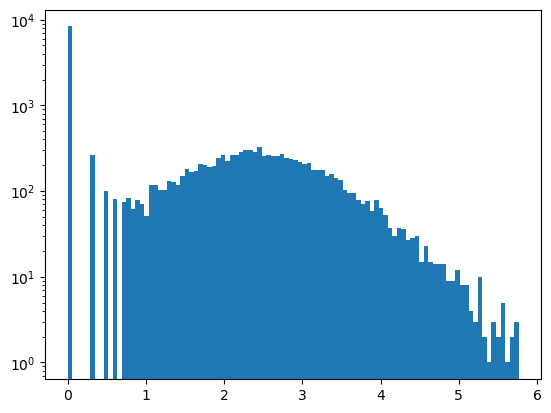

In [11]:
# Data seems to be normally distributed by log. 

tlist = []
for i in range(len(clf.filled_entries)):
    j, k = clf.filled_entries[i]
    tlist.append(log_df.iat[j, k])
import matplotlib.pyplot as plt
plt.hist(tlist, bins=100)
plt.yscale('log')
plt.show()